In [1]:
%pip install solidpython
%pip install setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from solid import color, cube, text, translate, union, linear_extrude, scad_render_to_file, scad_render, sphere, scale
from resources import braille
from solid.utils import up
import os

In [3]:
def create_points(point_1 = 0, point_2 = 0, point_3 = 0, point_4 = 0, point_5 = 0, point_6 = 0, spacing = 3):
    points = False

    if point_1 > 0:
        points = translate([0, spacing * 2, 0])(sphere(r=point_1))
    
    if point_2 > 0:
        if points:
            points = union()(points, translate([spacing, spacing * 2, 0])(sphere(r=point_2)))
        else:
            points = translate([spacing, spacing * 2, 0])(sphere(r=point_2))

    if point_3 > 0:
        if points:
            points = union()(points, translate([0, spacing, 0])(sphere(r=point_3)))
        else:
            points = translate([0, spacing, 0])(sphere(r=point_3))

    if point_4 > 0:
        if points:
            points = union()(points, translate([spacing, spacing, 0])(sphere(r=point_4)))
        else:
            points = translate([spacing, spacing, 0])(sphere(r=point_4))
    
    if point_5 > 0:
        if points:
            points = union()(points, translate([0, 0, 0])(sphere(r=point_5)))
        else:
            points = translate([0, 0, 0])(sphere(r=point_5))

    if point_6 > 0:
        if points:
            points = union()(points, translate([spacing, 0, 0])(sphere(r=point_6)))
        else:
            points = translate([spacing, 0, 0])(sphere(r=point_6))
    
    return points

    return union()(
        translate([0, spacing * 2, 0])(sphere(r=point_1)),
        translate([spacing, spacing * 2, 0])(sphere(r=point_2)),
        translate([0, spacing, 0])(sphere(r=point_3)),
        translate([spacing, spacing, 0])(sphere(r=point_4)),
        translate([0, 0, 0])(sphere(r=point_5)),
        translate([spacing, 0, 0])(sphere(r=point_6)),
    )

def braille_to_points(braille_text, size = 1, spacing = 3):
    braille_points = {
        "⠁": create_points(size, spacing=spacing),                                  # ⠁
        "⠃": create_points(size,0,size, spacing=spacing),                           # ⠃
        "⠉": create_points(size,size, spacing=spacing),                             # ⠉
        "⠙": create_points(size,size,0,size, spacing=spacing),                      # ⠙
        "⠑": create_points(size,0,0,size, spacing=spacing),                         # ⠑
        "⠋": create_points(size,size,size, spacing=spacing),                        # ⠋
        "⠛": create_points(size,size,size,size, spacing=spacing),                   # ⠛
        "⠓": create_points(size,0,size,size, spacing=spacing),                      # ⠓
        "⠊": create_points(0,size,size, spacing=spacing),                           # ⠊
        "⠚": create_points(0,size,size,size, spacing=spacing),                      # ⠚
        "⠅": create_points(size,0,0,0,size, spacing=spacing),                       # ⠅
        "⠇": create_points(size,0,size,0,size, spacing=spacing),                    # ⠇
        "⠍": create_points(size,size,0,0,size, spacing=spacing),                    # ⠍
        "⠝": create_points(size,size,0,size,size, spacing=spacing),                 # ⠝
        "⠕": create_points(size,0,0,size,size, spacing=spacing),                    # ⠕
        "⠏": create_points(size,size,size,0,size, spacing=spacing),                 # ⠏
        "⠟": create_points(size,size,size,size,size, spacing=spacing),              # ⠟
        "⠗": create_points(size,0,size,size,size,0, spacing=spacing),               # ⠗
        "⠎": create_points(0,size,size,0,size, spacing=spacing),                    # ⠎
        "⠞": create_points(0,size,size,size,size, spacing=spacing),                 # ⠞
        "⠥": create_points(size,0,0,0,size,size, spacing=spacing),                  # ⠥
        "⠧": create_points(size,0,size,0,size,size, spacing=spacing),               # ⠧
        "⠺": create_points(0,size,size,size,0,size, spacing=spacing),               # ⠺
        "⠭": create_points(size,size,0,0,size,size, spacing=spacing),               # ⠭
        "⠽": create_points(size,size,0,size,size,size, spacing=spacing),            # ⠽
        "⠵": create_points(size,0,0,size,size,size, spacing=spacing),               # ⠵
        "⠂": create_points(0,0,size, spacing=spacing),                              # ⠂
        "⠆": create_points(0,0,size,0,size, spacing=spacing),                       # ⠆
        "⠒": create_points(0,0,size,size, spacing=spacing),                         # ⠒
        "⠄": create_points(0,0,0,0,size, spacing=spacing),                          # ⠄
        "⠖": create_points(0,0,size,size,size, spacing=spacing),                    # ⠖
        "⠢": create_points(0,0,size,0,0,size, spacing=spacing),                     # ⠢
        "⠶": create_points(0,0,size,size,size,size, spacing=spacing),               # ⠶
        "⠱": create_points(size,0,0,size,0,size, spacing=spacing),                  # ⠱
        "⠠": create_points(0,0,0,0,0,size, spacing=spacing),                        # ⠠
        "⠯": create_points(size,size,size,0,size,size, spacing=spacing),            # ⠯
        "⠷": create_points(size,0,size,size,size,size, spacing=spacing),            # ⠷
        "⠫": create_points(size,size,size,0,0,size, spacing=spacing),               # ⠫
        "⠜": create_points(0,size,0,size,size, spacing=spacing),                    # ⠜
        "⠡": create_points(size,0,0,0,0,size, spacing=spacing),                     # ⠡
        "⠿": create_points(size,size,size,size,size,size, spacing=spacing),         # ⠿
        "⠣": create_points(size,0,size,0,0,size, spacing=spacing),                  # ⠣
        "⠌": create_points(0,size,0,0,size, spacing=spacing),                       # ⠌
        "⠬": create_points(0,size,0,0,size,size, spacing=spacing),                  # ⠬
        "⠹": create_points(size,size,0,size,0,size, spacing=spacing),               # ⠹
        "⠪": create_points(0,size,size,0,0,size, spacing=spacing),                  # ⠪
        "⠾": create_points(0,size,size,size,size,size, spacing=spacing),            # ⠾
        "⠼": create_points(0,size,0,size,size,size, spacing=spacing),               # ⠼
        "⠨": create_points(0,size,0,0,0,size, spacing=spacing),                     # ⠨
        "⣄": create_points(0,0,0,size,size,size, spacing=spacing),                  # ⣄
        " ": create_points(spacing=spacing),                                        #  
    }

    first_letter = True
    phrases = braille_text.split("\n")
    for index_p, phrase in enumerate(phrases):
        first_phrase_letter = True
        for index_l, letter in enumerate(phrase):
            if first_letter:
                points = translate([0, 0, 0])(braille_points[letter])
                first_phrase_letter = False
                first_letter = False
                continue
            
            if first_phrase_letter:
                points = union()(points, translate([0, -(spacing * 6 * (index_p)), 0])(braille_points[letter]))
                first_phrase_letter = False
                continue

            points = union()(points, translate([(spacing * 2.5 * (index_l)), -(spacing * 6 * (index_p)), 0])(braille_points[letter]))
    return points

⠨⠇⠁⠃⠕⠗⠁⠞⠬⠗⠊⠕ ⠙⠑ ⠨⠊⠍⠏⠗⠑⠎⠎⠜⠕
⠼⠉⠨⠨⠙ ⠑ ⠨⠊⠝⠉⠇⠥⠎⠊⠧⠁ ⠣⠨⠇⠨⠁⠨⠃⠨⠞⠨⠑⠨⠉⠼⠉⠨⠨⠙⠨⠨⠊⠨⠜


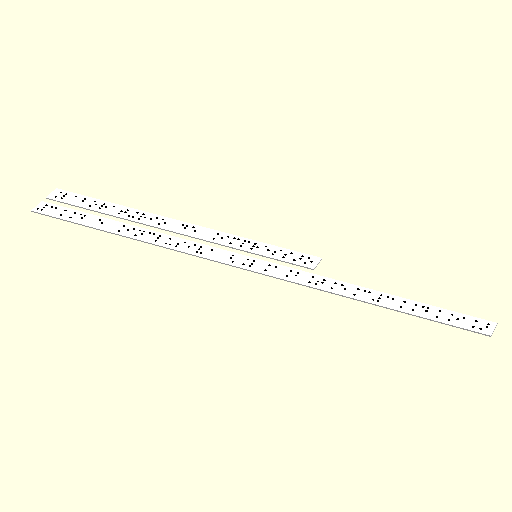

In [6]:
texto = "Laboratório de Impressão\n3D e Inclusiva (LABTEC3DI)"

tamanho_texto = 4
espacamento_texto = 15
tamanho_borda = 15
espessura_da_placa = 4

texto_braille = braille.text_to_braille(texto)
print(texto_braille)

texto_3d = color("black")(braille_to_points(texto_braille, tamanho_texto, espacamento_texto))

frases = texto_braille.split("\n")
tamanho_maior_frase = 0
quantidade_frases = len(frases)


altura = (espacamento_texto * 3.5) + tamanho_borda
largura = ((espacamento_texto * 2.5) * len(frases[0])) + tamanho_borda
superficie = color("white")(up(0)(cube([largura, altura, espessura_da_placa])))
for i in range(quantidade_frases - 1):
    largura = ((espacamento_texto * 2.5) * len(frases[i + 1])) + tamanho_borda
    superficie = union()(superficie, translate([0, -((espacamento_texto * 6) * (i + 1)), 0])(color("white")(up(0)(cube([largura, altura, espessura_da_placa])))))

modelo_final = union()(superficie, translate([espacamento_texto, (altura - (espacamento_texto * 3.25)), tamanho_texto])(texto_3d))
modelo_final = scale(0.33)(modelo_final)
modelo_final

In [7]:
# Exportar para STL
nome_arquivo = "placa_braille"

scad_path = "./" + nome_arquivo + ".scad"
stl_path = "./" + nome_arquivo + ".stl"

scad_render_to_file(modelo_final, scad_path)

os.system(f"openscad -o {stl_path} {scad_path} --render")

print(f"Arquivo STL criado: {stl_path}")

Arquivo STL criado: ./placa_braille.stl
